In [1]:
# Preparation 
import numpy as np
filename = "D1.txt"
with open(filename, 'r') as f:
    lines = f.readlines()
data_array = np.array([list(map(float,line.strip().split())) for line in lines])
class Node:
    def __init__ (self, prediction = None, feature_idx = None, threshhold = None, left = None, right = None):
        self.prediction = prediction
        self.feature_idx = feature_idx
        self.threshhold = threshhold
        self.left = left
        self.right = right
        
def entropy(y): # calculate the entropy
    p = np.mean(y) # Only valide when y is long to {0,1}
    if p ==0 or p==1: # Below function will not be defiend for these special cases
        return 0
    else:
        return -p*np.log2(p)-(1-p)*np.log2(1-p)

def information_gain_ratio(data_array, feature_idx, threshold):
    left_child = data_array[:,feature_idx] >= threshold # return to the left 
    right_child = data_array[:,feature_idx] < threshold # return to the right
    if np.all(left_child) or np.all(right_child): # if the threhold cant split the data, then it does nothing
        return 0
    # calculate the entropy
    total_entropy = entropy(data_array[:,2])
    left_entropy = entropy(data_array[left_child, 2])
    right_entropy = entropy(data_array[right_child, 2])
    # calculate the weight average entropy
    left_weight = np.sum(left_child)/len(data_array)
    right_weight = np.sum(right_child)/len(data_array)
    weighted_average_entropy = left_weight*left_entropy + right_weight*right_entropy
    # calculate information gain
    information_gain = total_entropy - weighted_average_entropy
    # calculate the split information
    split_information = -left_weight*np.log2(left_weight) - right_weight*np.log2(right_weight)
    if split_information == 0:
        return 0
    return information_gain / split_information

def split(data_array): # this function find the best way to split data
    best_feature_idx = None
    best_threshhold = None
    best_information_gain_ratio = -1
    for feature_idx in range(2):
        threshholds = np.unique(data_array[:,feature_idx])
        for threshhold in threshholds:
            loop_information_gain_ratio = information_gain_ratio(data_array,feature_idx,threshhold)
            if loop_information_gain_ratio > best_information_gain_ratio:
                best_feature_idx = feature_idx
                best_threshhold = threshhold
                best_information_gain_ratio = loop_information_gain_ratio
    return best_feature_idx, best_threshhold

def pureness(data_array): # check if only one class left
    label_set = np.unique(data_array[:,2])
    return len(label_set) == 1
def majority(data_array):
    if np.sum(data_array[:,2]==1) >= (len(data_array)/2):
        return 1
    else:
        return 0
def decision_tree(data_array, starting_depth=1, max_depth=10):
    feature_idx, threshhold = split(data_array)
    if pureness(data_array):
        return Node(prediction = majority(data_array))
    if max_depth and starting_depth >= max_depth:
        return Node(prediction = majority(data_array))
    left_data_array = data_array[data_array[:,feature_idx] >= threshhold]
    right_data_array = data_array[data_array[:,feature_idx] < threshhold]
    left_child = decision_tree(left_data_array, starting_depth+1, max_depth)
    right_child = decision_tree(right_data_array, starting_depth+1, max_depth)
    return Node(feature_idx = feature_idx, threshhold = threshhold, left = left_child, right = right_child)

def predict(decisiontree,x):
    if decisiontree.prediction is not None:
        return decisiontree.prediction
    if x[decisiontree.feature_idx] >= decisiontree.threshhold:
        new_node = decisiontree.left
    else:
        new_node = decisiontree.right
    return predict(new_node, x)

tree = decision_tree(data_array)
for row in data_array:
    print(predict(tree, row[:-1]), row[-1])

0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.

In [2]:
# Question 5
import numpy as np
filename = "D2.txt"
with open(filename, 'r') as f:
    lines = f.readlines()
data_array = np.array([list(map(float,line.strip().split())) for line in lines])
class Node:
    def __init__ (self, prediction = None, feature_idx = None, threshhold = None, left = None, right = None):
        self.prediction = prediction
        self.feature_idx = feature_idx
        self.threshhold = threshhold
        self.left = left
        self.right = right
        
def entropy(y): # calculate the entropy
    p = np.mean(y) # Only valide when y is long to {0,1}
    if p ==0 or p==1: # Below function will not be defiend for these special cases
        return 0
    else:
        return -p*np.log2(p)-(1-p)*np.log2(1-p)

def information_gain_ratio(data_array, feature_idx, threshold):
    left_child = data_array[:,feature_idx] >= threshold # return to the left 
    right_child = data_array[:,feature_idx] < threshold # return to the right
    if np.all(left_child) or np.all(right_child): # if the threhold cant split the data, then it does nothing
        return 0
    # calculate the entropy
    total_entropy = entropy(data_array[:,2])
    left_entropy = entropy(data_array[left_child, 2])
    right_entropy = entropy(data_array[right_child, 2])
    # calculate the weight average entropy
    left_weight = np.sum(left_child)/len(data_array)
    right_weight = np.sum(right_child)/len(data_array)
    weighted_average_entropy = left_weight*left_entropy + right_weight*right_entropy
    # calculate information gain
    information_gain = total_entropy - weighted_average_entropy
    # calculate the split information
    split_information = -left_weight*np.log2(left_weight) - right_weight*np.log2(right_weight)
    if split_information == 0:
        return 0
    return information_gain / split_information

def split(data_array): # this function find the best way to split data
    best_feature_idx = None
    best_threshhold = None
    best_information_gain_ratio = -1
    for feature_idx in range(2):
        threshholds = np.unique(data_array[:,feature_idx])
        for threshhold in threshholds:
            loop_information_gain_ratio = information_gain_ratio(data_array,feature_idx,threshhold)
            if loop_information_gain_ratio > best_information_gain_ratio:
                best_feature_idx = feature_idx
                best_threshhold = threshhold
                best_information_gain_ratio = loop_information_gain_ratio
    return best_feature_idx, best_threshhold

def pureness(data_array): # check if only one class left
    label_set = np.unique(data_array[:,2])
    return len(label_set) == 1
def majority(data_array):
    if np.sum(data_array[:,2]==1) >= (len(data_array)/2):
        return 1
    else:
        return 0
def decision_tree(data_array, starting_depth=1, max_depth=20):
    feature_idx, threshhold = split(data_array)
    print(f"best_feaure_idx{feature_idx}, best_threshhold{threshhold}, depth{starting_depth}")
    if pureness(data_array):
        return Node(prediction = majority(data_array))
    if max_depth and starting_depth >= max_depth:
        return Node(prediction = majority(data_array))
    left_data_array = data_array[data_array[:,feature_idx] >= threshhold]
    right_data_array = data_array[data_array[:,feature_idx] < threshhold]
    left_child = decision_tree(left_data_array, starting_depth+1, max_depth)
    right_child = decision_tree(right_data_array, starting_depth+1, max_depth)
    return Node(feature_idx = feature_idx, threshhold = threshhold, left = left_child, right = right_child)

def predict(decisiontree,x):
    if decisiontree.prediction is not None:
        return decisiontree.prediction
    if x[decisiontree.feature_idx] >= decisiontree.threshhold:
        new_node = decisiontree.left
    else:
        new_node = decisiontree.right
    return predict(new_node, x)

tree = decision_tree(data_array)
for row in data_array:
    print(predict(tree, row[:-1]), row[-1])

best_feaure_idx0, best_threshhold0.533076, depth1
best_feaure_idx1, best_threshhold0.228007, depth2
best_feaure_idx1, best_threshhold0.424906, depth3
best_feaure_idx0, best_threshhold0.533076, depth4
best_feaure_idx0, best_threshhold0.708127, depth4
best_feaure_idx0, best_threshhold0.708127, depth5
best_feaure_idx1, best_threshhold0.32625, depth5
best_feaure_idx0, best_threshhold0.595471, depth6
best_feaure_idx0, best_threshhold0.646007, depth7
best_feaure_idx0, best_threshhold0.646007, depth8
best_feaure_idx1, best_threshhold0.403494, depth8
best_feaure_idx0, best_threshhold0.595471, depth9
best_feaure_idx0, best_threshhold0.597291, depth9
best_feaure_idx0, best_threshhold0.541762, depth7
best_feaure_idx0, best_threshhold0.538288, depth6
best_feaure_idx0, best_threshhold0.887224, depth3
best_feaure_idx1, best_threshhold0.037708, depth4
best_feaure_idx1, best_threshhold0.082895, depth5
best_feaure_idx0, best_threshhold0.887224, depth6
best_feaure_idx0, best_threshhold0.960783, depth6
b

best_feaure_idx0, best_threshhold0.533076, depth1
best_feaure_idx1, best_threshhold0.228007, depth2
best_feaure_idx1, best_threshhold0.424906, depth3
best_feaure_idx0, best_threshhold0.533076, depth4
best_feaure_idx0, best_threshhold0.708127, depth4
best_feaure_idx0, best_threshhold0.708127, depth5
best_feaure_idx1, best_threshhold0.32625, depth5
best_feaure_idx0, best_threshhold0.595471, depth6
best_feaure_idx0, best_threshhold0.646007, depth7
best_feaure_idx0, best_threshhold0.646007, depth8
best_feaure_idx1, best_threshhold0.403494, depth8
best_feaure_idx0, best_threshhold0.595471, depth9
best_feaure_idx0, best_threshhold0.597291, depth9
best_feaure_idx0, best_threshhold0.541762, depth7
best_feaure_idx0, best_threshhold0.538288, depth6
best_feaure_idx0, best_threshhold0.887224, depth3
best_feaure_idx1, best_threshhold0.037708, depth4
best_feaure_idx1, best_threshhold0.082895, depth5
best_feaure_idx0, best_threshhold0.887224, depth6
best_feaure_idx0, best_threshhold0.960783, depth6
b

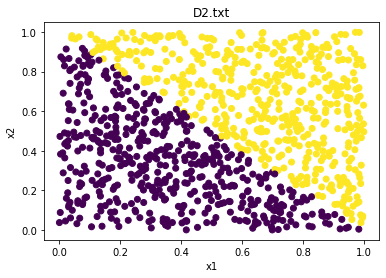

In [3]:
# Question 6
import numpy as np
import matplotlib.pyplot as plt
filename = "D2.txt"
with open(filename, 'r') as f:
    lines = f.readlines()
data_array = np.array([list(map(float,line.strip().split())) for line in lines])
x = data_array[:,0]
y = data_array[:,1]
colors = data_array[:,2]
scatter_plt = plt.scatter(x, y , c = colors)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("D2.txt")
class Node:
    def __init__ (self, prediction = None, feature_idx = None, threshhold = None, left = None, right = None):
        self.prediction = prediction
        self.feature_idx = feature_idx
        self.threshhold = threshhold
        self.left = left
        self.right = right
        
def entropy(y): # calculate the entropy
    p = np.mean(y) # Only valide when y is long to {0,1}
    if p ==0 or p==1: # Below function will not be defiend for these special cases
        return 0
    else:
        return -p*np.log2(p)-(1-p)*np.log2(1-p)

def information_gain_ratio(data_array, feature_idx, threshold):
    left_child = data_array[:,feature_idx] >= threshold # return to the left 
    right_child = data_array[:,feature_idx] < threshold # return to the right
    if np.all(left_child) or np.all(right_child): # if the threhold cant split the data, then it does nothing
        return 0
    # calculate the entropy
    total_entropy = entropy(data_array[:,2])
    left_entropy = entropy(data_array[left_child, 2])
    right_entropy = entropy(data_array[right_child, 2])
    # calculate the weight average entropy
    left_weight = np.sum(left_child)/len(data_array)
    right_weight = np.sum(right_child)/len(data_array)
    weighted_average_entropy = left_weight*left_entropy + right_weight*right_entropy
    # calculate information gain
    information_gain = total_entropy - weighted_average_entropy
    # calculate the split information
    split_information = -left_weight*np.log2(left_weight) - right_weight*np.log2(right_weight)
    if split_information == 0:
        return 0
    return information_gain / split_information

def split(data_array): # this function find the best way to split data
    best_feature_idx = None
    best_threshhold = None
    best_information_gain_ratio = -1
    for feature_idx in range(2):
        threshholds = np.unique(data_array[:,feature_idx])
        for threshhold in threshholds:
            loop_information_gain_ratio = information_gain_ratio(data_array,feature_idx,threshhold)
            if loop_information_gain_ratio > best_information_gain_ratio:
                best_feature_idx = feature_idx
                best_threshhold = threshhold
                best_information_gain_ratio = loop_information_gain_ratio
    return best_feature_idx, best_threshhold

def pureness(data_array): # check if only one class left
    label_set = np.unique(data_array[:,2])
    return len(label_set) == 1
def majority(data_array):
    if np.sum(data_array[:,2]==1) >= (len(data_array)/2):
        return 1
    else:
        return 0
def decision_tree(data_array, starting_depth=1, max_depth=20):
    feature_idx, threshhold = split(data_array)
    print(f"best_feaure_idx{feature_idx}, best_threshhold{threshhold}, depth{starting_depth}")
    if pureness(data_array):
        return Node(prediction = majority(data_array))
    if max_depth and starting_depth >= max_depth:
        return Node(prediction = majority(data_array))
    left_data_array = data_array[data_array[:,feature_idx] >= threshhold]
    right_data_array = data_array[data_array[:,feature_idx] < threshhold]
    left_child = decision_tree(left_data_array, starting_depth+1, max_depth)
    right_child = decision_tree(right_data_array, starting_depth+1, max_depth)
    return Node(feature_idx = feature_idx, threshhold = threshhold, left = left_child, right = right_child)

def predict(decisiontree,x):
    if decisiontree.prediction is not None:
        return decisiontree.prediction
    if x[decisiontree.feature_idx] >= decisiontree.threshhold:
        new_node = decisiontree.left
    else:
        new_node = decisiontree.right
    return predict(new_node, x)

tree = decision_tree(data_array)
for row in data_array:
    print(predict(tree, row[:-1]), row[-1])

Text(0.5, 1.0, 'Learning Curve')

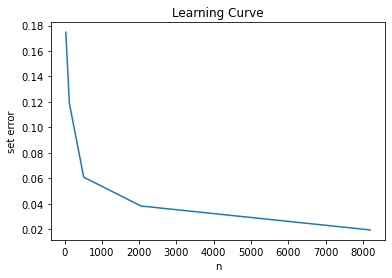

In [4]:
# Question 7
import numpy as np
import matplotlib.pyplot as plt
filename = "Dbig.txt"
with open(filename, 'r') as f:
    lines = f.readlines()
data_array = np.array([list(map(float,line.strip().split())) for line in lines])
shuffled_idx = np.random.permutation(len(data_array))
train = data_array[shuffled_idx[:8192]]
test = data_array[shuffled_idx[8192:]]
D32 = train[:32]
D128 = train[:128]
D512 = train[:512]
D2048 = train[:2048]
D8192 = train[:8192]
class Node:
    def __init__ (self, prediction = None, feature_idx = None, threshhold = None, left = None, right = None):
        self.prediction = prediction
        self.feature_idx = feature_idx
        self.threshhold = threshhold
        self.left = left
        self.right = right
        
def entropy(y): # calculate the entropy
    p = np.mean(y) # Only valide when y is long to {0,1}
    if p ==0 or p==1: # Below function will not be defiend for these special cases
        return 0
    else:
        return -p*np.log2(p)-(1-p)*np.log2(1-p)

def information_gain_ratio(data_array, feature_idx, threshold):
    left_child = data_array[:,feature_idx] >= threshold # return to the left 
    right_child = data_array[:,feature_idx] < threshold # return to the right
    if np.all(left_child) or np.all(right_child): # if the threhold cant split the data, then it does nothing
        return 0
    # calculate the entropy
    total_entropy = entropy(data_array[:,2])
    left_entropy = entropy(data_array[left_child, 2])
    right_entropy = entropy(data_array[right_child, 2])
    # calculate the weight average entropy
    left_weight = np.sum(left_child)/len(data_array)
    right_weight = np.sum(right_child)/len(data_array)
    weighted_average_entropy = left_weight*left_entropy + right_weight*right_entropy
    # calculate information gain
    information_gain = total_entropy - weighted_average_entropy
    # calculate the split information
    split_information = -left_weight*np.log2(left_weight) - right_weight*np.log2(right_weight)
    if split_information == 0:
        return 0
    return information_gain / split_information

def split(data_array): # this function find the best way to split data
    best_feature_idx = None
    best_threshhold = None
    best_information_gain_ratio = -1
    for feature_idx in range(2):
        threshholds = np.unique(data_array[:,feature_idx])
        for threshhold in threshholds:
            loop_information_gain_ratio = information_gain_ratio(data_array,feature_idx,threshhold)
            if loop_information_gain_ratio > best_information_gain_ratio:
                best_feature_idx = feature_idx
                best_threshhold = threshhold
                best_information_gain_ratio = loop_information_gain_ratio
    return best_feature_idx, best_threshhold

def pureness(data_array): # check if only one class left
    label_set = np.unique(data_array[:,2])
    return len(label_set) == 1
def majority(data_array):
    if np.sum(data_array[:,2]==1) >= (len(data_array)/2):
        return 1
    else:
        return 0
def decision_tree(data_array, starting_depth=1, max_depth=20):
    feature_idx, threshhold = split(data_array)
    #print(f"best_feaure_idx{feature_idx}, best_threshhold{threshhold}, depth{starting_depth}")
    if pureness(data_array):
        return Node(prediction = majority(data_array))
    if max_depth and starting_depth >= max_depth:
        return Node(prediction = majority(data_array))
    left_data_array = data_array[data_array[:,feature_idx] >= threshhold]
    right_data_array = data_array[data_array[:,feature_idx] < threshhold]
    left_child = decision_tree(left_data_array, starting_depth+1, max_depth)
    right_child = decision_tree(right_data_array, starting_depth+1, max_depth)
    return Node(feature_idx = feature_idx, threshhold = threshhold, left = left_child, right = right_child)

def predict(decisiontree,x):
    if decisiontree.prediction is not None:
        return decisiontree.prediction
    if x[decisiontree.feature_idx] >= decisiontree.threshhold:
        new_node = decisiontree.left
    else:
        new_node = decisiontree.right
    return predict(new_node, x)

datasets = [D32, D128, D512, D2048, D8192]
num_data = []
num_node = []
errn = []
def count_node(node):
    if node is None:
        return 0
    if node.prediction is not None:
        return 1
    return 1 + count_node(node.left) + count_node(node.right)
for data in datasets:
    tree = decision_tree(data)
    correct_prediction = 0
    for row in test:
        if predict(tree, row[:-1])==row[-1]:
            correct_prediction += 1
    error = 1-(correct_prediction/len(test))
    errn.append(error)
    num_data.append(len(data))
    num_node.append(count_node(tree))
plt.figure()
plt.plot(num_data, errn)
plt.xlabel("n")
plt.ylabel("set error")
plt.title("Learning Curve")
#for row in test:
#    print(predict(tree, row[:-1]), row[-1])

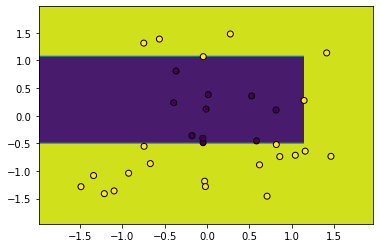

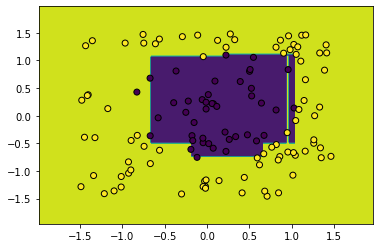

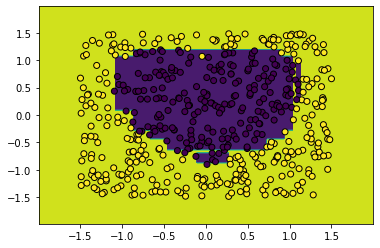

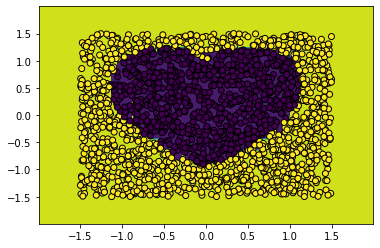

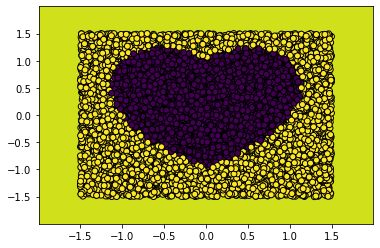

In [5]:
def plot_decision_boundary(tree, data):
    x_min, x_max = data[:, 0].min() -0.5, data[:,0].max() +0.5
    y_min, y_max = data[:, 1].min() -0.5, data[:,1].max() +0.5
    xx, yy =np.meshgrid(np.linspace(x_min,x_max,1000),np.linspace(y_min,y_max,100))
    Zero_matrix = np.zeros(xx.shape)
    
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            Zero_matrix[i,j] = predict(tree,[xx[i,j],yy[i,j]])
    plt.contourf(xx,yy,Zero_matrix)
    plt.scatter(data[:, 0], data[:,1], c=data[:,2], edgecolors='k')
    plt.show()
for data in datasets:
    tree = decision_tree(data)
    plot_decision_boundary(tree, data)
    

[7, 31, 43, 133, 225]
[0.18141592920353977, 0.1211283185840708, 0.042588495575221264, 0.036504424778761035, 0.013274336283185861]


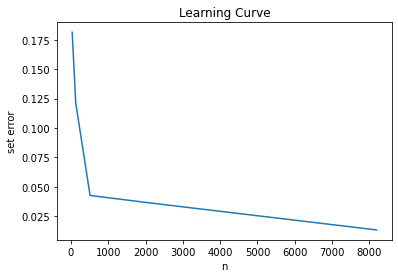

In [6]:
# Question 3(8)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
datasets = [D32, D128, D512, D2048, D8192]
num_data = []
num_node = []
errn = []
for data in datasets:
    x_train = data[:,0:2]
    y_train = data[:,-1]
    dtr = DecisionTreeClassifier()
    dtr.fit(x_train, y_train)
    x_test = test[:,0:2]
    y_test = test[:,-1]
    predictions = dtr.predict(x_test)
    error = 1- accuracy_score(y_test,predictions)
    errn.append(error)
    num_data.append(len(data))
    num_node.append(dtr.tree_.node_count)
plt.figure()
plt.plot(num_data, errn)
plt.xlabel("n")
plt.ylabel("set error")
plt.title("Learning Curve")
print(num_node)
print(errn)

In [7]:
# Question 4(9)
import numpy as np
from scipy.interpolate import lagrange
x_train = np.linspace(0, 100,100)
y_train = np.sin(x_train)
x_test = np.linspace(0,100,66)
y_test = np.sin(x_test)
poly = lagrange(x_train, y_train)
def log_mean_squared_error(real_value, prediction_value):
    return np.log(np.mean(real_value-prediction_value)**2)
train_error =log_mean_squared_error(y_train,poly(x_train))
test_error = log_mean_squared_error(y_test,poly(x_test))
print(train_error)
print(test_error)

317.2428917083456
317.5429668804996


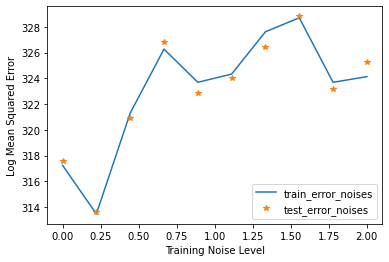

In [8]:
import matplotlib.pyplot as plt
noises = np.linspace(0,2,10)
train_error_noises = []
test_error_noises = []
for noise in noises:
    x_train_noise = x_train + np.random.normal(0, noise, x_train.shape)
    y_train_noise = np.sin(x_train_noise)
    poly_noise = lagrange(x_train_noise, y_train_noise)
    train_error_noise =log_mean_squared_error(y_train_noise,poly_noise(x_train_noise))
    test_error_noise = log_mean_squared_error(y_test,poly_noise(x_test))
    train_error_noises.append(train_error_noise)
    test_error_noises.append(test_error_noise)
plt.figure()
plt.plot(noises, train_error_noises, '-', label = "train_error_noises")
plt.plot(noises, test_error_noises, '*', label = "test_error_noises")
plt.xlabel("Training Noise Level")
plt.ylabel('Log Mean Squared Error')
plt.legend()